# Финальная самостоятельная работа :)

Ни пуха, ни пера!

       group     k1  k2_min  k2_probs    dc  ekz_I  lecture_test     k3  \
0     БЭК171  134.0    30.0      29.0   3.0   17.0           6.0   61.0   
1     БЭК171  110.0    40.0      35.0  10.0   24.0          10.0   53.0   
2     БЭК171  109.0    40.0      18.0   3.0   22.0           6.0   73.0   
3     БЭК171  129.0    40.0      18.0  10.0   25.0          10.0   86.0   
4     БЭК171  175.0    40.0      55.0   5.0   29.0          10.0  100.0   
5     БЭК171  112.0    40.0      31.0   5.0   16.0          10.0   88.0   
6     БЭК171  134.0    25.0      45.0  10.0   23.0          10.0   97.0   
7     БЭК171  128.0    40.0      28.0  10.0   24.0          10.0   63.0   
8     БЭК171  137.0    40.0      40.0  10.0   21.0          10.0   65.0   
9     БЭК171  132.0    39.0      45.0  10.0   22.0          10.0   84.0   
10    БЭК171  133.0    40.0      45.0  10.0   22.0          10.0   83.0   
11    БЭК171  135.0    40.0      45.0   3.0   24.0          10.0   84.0   
12    БЭК171  135.0    40

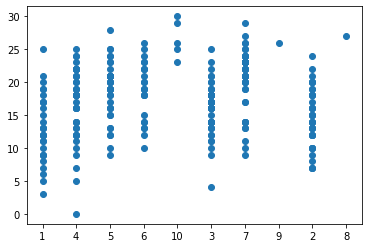

In [6]:
# добрые гномы подсказывают как могут!!!

import numpy as np
import pandas as pd
import seaborn as sns
# - Фил, как там дальше?
df = pd.read_csv('data.csv')
#######task 1.1#########
df.drop(df[df['ekz_final'] == 'неявка'].index, inplace = True) 
#######task 1.2#########
res=[]
for li in df['ekz_final']:
    if int(li) >= 4 : res.append(1)
    else:   res.append(0)
df['pass'] = res
print(df)
########task 1.3#######
import matplotlib.pyplot as plt
plt.scatter(y=df['ekz_I'], x=df['ekz_final'])
plt.show()
########task 1.4#######
lili = ["k1", "k2_min", "k2_probs", "dc", "ekz_I", "lecture_test", "k3", "k4", "auditorka", "ekz_final"]
for li in lili:
    df.loc[df[li].isnull(), li] = df[li].mean()
df.loc[df["k1"].isnull(), "k1"] = df["k1"].mean()
df.loc[df["k2_min"].isnull(), "k2_min"] = df["k2_min"].mean()
df.loc[df["k2_probs"].isnull(), "k2_probs"] = df["k2_probs"].mean()
df.loc[df["dc"].isnull(), "dc"] = df["dc"].mean()
df.loc[df["ekz_I"].isnull(), "ekz_I"] = df["ekz_I"].mean()
df.loc[df["lecture_test"].isnull(), "lecture_test"] = df["lecture_test"].mean()
df.loc[df["k3"].isnull(), "k3"] = df["k3"].mean()
df.loc[df["k4"].isnull(), "k4"] = df["k4"].mean()
df.loc[df["auditorka"].isnull(), "auditorka"] = df["auditorka"].mean()
df.loc[df["ekz_final"].isnull(), "ekz_final"] = df["ekz_final"].mean()


## Задачулька 1

Перед тобой результаты по теории вероятностей студентов одного из прошедших годов.

> group — группа студента

> ekz_final — финальный экзамен, переменная, которую мы будем предсказывать

> остальные переменные — различные формы контроля до финального экзамена

1. Удали из выборки данные студентов, не явившихся на финальный экзамен.

2. Создай переменную pass равную единице для студентов, сдавших экзамен на 4 и выше, и нулю иначе.

3. Построй диаграмму рассеяния оценки за финальный экзамен (ekz_final) и оценки за промежуточный экзамен (ekz_I).

4. Заполни все пропуски в числовых переменных медианным значением, пропуск в группе можно считать особой группой и не заполнять.

5. Раздели всю выборку на две части: обучающую 80% и тестовую 20%.

*Подсказка от добрых гномов: ты ведь помнишь, что неплохо фиксировать зерно, чтобы всходы были реплицируемы?*

## Задачулька 2

Сейчас мы прогнозируем ekz_final.

1. На обучающей выборке оцени простую регрессию для прогнозирования.

2. На обучающей выборке оцени LASSO-регрессию с подбором штрафного коэффициента с помощью кросс-валидации.

3. На обучающей выборке оцени гребневую (ridge) регрессию с подбором штрафного коэффициента с помощью кросс-валидации.

4. На обучающей выборке построй случайный лес из 1000 деревьев. 

5. Сравни качество всех построенных моделей на тестовой выборке.


Число групп (fold) в кросс-валидации бери равным пяти, в качестве целевого показателя — среднеквадратичную ошибку (MSE).
Группу студента в моделях (1)-(2)-(3) можно не учитывать. 

*Подсказка от добрых гномов: ты ведь помнишь, что для каких-то там алгоритмов данные надо масштабировать?*

## Задачулька 3

Сейчас мы прогнозируем pass.

1. На обучающей выборке оцени логистическую регрессию без штрафа для прогнозирования.

2. На обучающей выборке построй лес из 1000 деревьев.

3. Построй ROC-кривые оценнных моделей на тестовой выборке. 

4. Сравни качество всех построенных моделей на тестовой выборке с помощью площади под ROC-кривой.

5. Для наилучшей модели и выбранного на глаз порога для вероятности посчитай таблицу сопряжённости.

Число групп (fold) в кросс-валидации бери равным пяти. В качестве целевого показателя — площадь под ROC-кривой. Группу студента в модели (1) можно не учитывать.

*Подсказка от добрых гномов: ну ты помнишь? и рандомизацию ещё фиксировать?*

## Задачулька 4

Если ты супер крут и решил прошлые задачки, а времени ещё вагон, то можешь получить бонусные баллы! 

Придумай новые фичи, подбери алгоритм прогнозирования, построй симпатичную картинку!
Сосредоточь свои усилия на чём-то одном: либо прогнозировании либо самой оценки, либо бинарного показателя pass.

И да, [посади дерево](https://www.youtube.com/watch?v=h0gKrN8rDmI)!